In [20]:
import os

dataset_path = '/Users/emma/Desktop/becode_projects/MNIST-Handwriten-Digit-Classification/dataset'
print("Files in dataset folder:", os.listdir(dataset_path))

Files in dataset folder: ['train-labels.idx1-ubyte', 'train-images.idx3-ubyte', 't10k-labels.idx1-ubyte', 't10k-images.idx3-ubyte']


In [21]:
import os


dataset_path = 'dataset'
absolute_path = os.path.abspath(dataset_path)
#print(absolute_path)
train_images_path = os.path.join(absolute_path, 'train-images.idx3-ubyte')
train_labels_path = os.path.join(absolute_path, 'train-labels.idx1-ubyte')
test_images_path = os.path.join(absolute_path, 't10k-images.idx3-ubyte')
test_labels_path = os.path.join(absolute_path, 't10k-labels.idx1-ubyte')




In [22]:
import numpy as np
import struct

def read_idx(filename):
    with open(filename, 'rb') as f:
        # Parse header based on IDX format
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)


In [23]:
# Load train and test images and labels
X_train = read_idx(train_images_path)
y_train = read_idx(train_labels_path)
X_test = read_idx(test_images_path)
y_test = read_idx(test_labels_path)

# Check shapes
print('Train Images Shape:', X_train.shape)
print('Train Labels Shape:', y_train.shape)
print('Test Images Shape:', X_test.shape)
print('Test Labels Shape:', y_test.shape)


Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


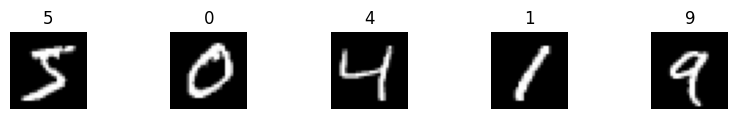

In [24]:
import matplotlib.pyplot as plt

# Display first 10 images
plt.figure(figsize=(10, 1))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
    plt.axis('off')
plt.show()


In [25]:
#Flatten and normalize images
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [27]:
import tensorflow as tf

# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)



In [28]:
print("y_train shape:", y_train.shape)  # Should ideally be (batch_size, 10)


y_train shape: (48000, 10)


In [29]:
# Create a model
model = tf.keras.models.Sequential()


In [30]:

# Input katmanı
model.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Input layer
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [31]:
# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu')) #hidden layer1
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu')) #hidden layer2
model.add(tf.keras.layers.Dropout(0.3))

In [32]:
# Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True, 
    verbose=1            
)

In [38]:
# model training
results = model.fit(X_train, y_train, epochs=25, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9957 - loss: 0.0164 - val_accuracy: 0.9843 - val_loss: 0.0984
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9860 - val_loss: 0.0947
Epoch 3/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9967 - loss: 0.0129 - val_accuracy: 0.9846 - val_loss: 0.0911
Epoch 4/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9842 - val_loss: 0.1000
Epoch 5/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9854 - val_loss: 0.0910
Epoch 6/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 0.9861 - val_loss: 0.0900
Epoch 7/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9847 - val_loss: 0.0905
Epoch 8/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.